In [1]:
! pip install bertopic
from bertopic import BERTopic
from umap import UMAP
import pandas as pd
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [2]:
all_text_clean = pd.read_excel("all_floyd_cleaned_final.xlsx")
dem_text_clean = pd.read_excel("dem_floyd_cleaned_final.xlsx")
rep_text_clean = pd.read_excel("rep_floyd_cleaned_final.xlsx")

In [3]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=388)
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(all_text_clean['text_clean'].astype('str'))

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [4]:
topic_model.update_topics(all_text_clean['text_clean'].astype('str'), n_gram_range=(1,2))

In [5]:
# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1009,-1_justice_police_officer_peaceful,"[justice, police, officer, peaceful, murder, b...",[murder thousands americans country injustice ...
1,0,292,0_right_peaceful_violence_riot,"[right, peaceful, violence, riot, loot, peacef...",[exercise amendment right enact change end rac...
2,1,164,1_police_officer_enforcement_law enforcement,"[police, officer, enforcement, law enforcement...",[life today join w introduce resolution condem...
3,2,125,2_honor_today_family_mourn,"[honor, today, family, mourn, life, love, memo...",[national day mourn prayers family love ones t...
4,3,108,3_racism_black_systemic_systemic racism,"[racism, black, systemic, systemic racism, cou...",[senseless kill hand police latest long line r...
5,4,96,4_taylor_breonna taylor_breonna_arbery,"[taylor, breonna taylor, breonna, arbery, ahma...",[racism america alive recent kill ahmaud arber...
6,5,69,5_military_president_trump_troop,"[military, president, trump, troop, president ...",[defense secretary esper say support president...
7,6,46,6_accountable_officer_hold accountable_officer...,"[accountable, officer, hold accountable, offic...",[murder single officer involve hold accountabl...
8,7,42,7_chauvin hold_minutes min_hold knee_second derek,"[chauvin hold, minutes min, hold knee, second ...",[derek chauvin hold knee neck minutes min seco...
9,8,38,8_demonstrations_peaceful demonstrations_march...,"[demonstrations, peaceful demonstrations, marc...",[governments world use military force curtail ...


In [6]:
# Visualize top topic keywords
topic_model.visualize_barchart(top_n_topics=10)

In [7]:
topic_model.visualize_topics()

In [8]:
topic_model.visualize_heatmap()

In [9]:
# Calculate Silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(probabilities, topics)
print(silhouette_avg)

0.28260760712210975


In [10]:
# Visualize connections between topics using hierachical clustering
topic_model.visualize_hierarchy(top_n_topics=10)

In [11]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]
# Save the predictions in the dataframe
all_text_clean['topic_prediction'] = topic_prediction
# Take a look at the data
all_text_clean.head()

,Unnamed: 0.1,Unnamed: 0,first_name,last_name,party,author_id,lang,id,created_at,text,text_no_url,text_no_username,text_no_symbol,text_no_hashtag,text_no_punct,text_no_number,text_lower,text_no_stopword,text_clean,topic_prediction
0,0,369,Kamala,Harris,D,803694179079458816,en,1265324956558163968,2020-05-26T16:52:32.000Z,We are fed up with Black lives being taken. Of...,We are fed up with Black lives being taken. Of...,We are fed up with Black lives being taken. Of...,We are fed up with Black lives being taken. Of...,We are fed up with Black lives being taken. Of...,We are fed up with Black lives being taken Off...,We are fed up with Black lives being taken Off...,we are fed up with black lives being taken off...,fed black lives taken officers held accountabl...,feed black live take officer hold accountable ...,1
1,1,15261,Justin,Amash,I,233842454,en,1265336582648847872,2020-05-26T17:38:44.000Z,George Floyd was murdered—callously and casual...,George Floyd was murdered—callously and casual...,George Floyd was murdered—callously and casual...,George Floyd was murdered callously and casual...,George Floyd was murdered callously and casual...,George Floyd was murdered callously and casual...,George Floyd was murdered callously and casual...,george floyd was murdered callously and casual...,murdered callously casually life meaning justice,murder callously casually life mean justice,-1
2,2,11407,Eric,Swalwell,D,942156122,en,1265347363331342080,2020-05-26T18:21:35.000Z,This is uncomfortable to watch. Which is why y...,This is uncomfortable to watch. Which is why y...,This is uncomfortable to watch. Which is why y...,This is uncomfortable to watch. Which is why y...,This is uncomfortable to watch. Which is why y...,This is uncomfortable to watch Which is why yo...,This is uncomfortable to watch Which is why yo...,this is uncomfortable to watch which is why yo...,uncomfortable watch watch defend officer right...,uncomfortable watch watch defend officer right...,-1
3,3,11406,Eric,Swalwell,D,942156122,en,1265350036835241984,2020-05-26T18:32:12.000Z,It should not matter what your political party...,It should not matter what your political party...,It should not matter what your political party...,It should not matter what your political party...,It should not matter what your political party...,It should not matter what your political party...,It should not matter what your political party...,it should not matter what your political party...,matter political party happened,matter political party happen,13
4,4,3319,Sherrod,Brown,D,43910797,en,1265358389208588032,2020-05-26T19:05:23.000Z,Demand #JusticeForFloyd. How many more Black l...,Demand #JusticeForFloyd. How many more Black l...,Demand #JusticeForFloyd. How many more Black l...,Demand #JusticeForFloyd. How many more Black l...,Demand. How many more Black lives must be take...,Demand How many more Black lives must be taken...,Demand How many more Black lives must be taken...,demand how many more black lives must be taken...,demand black lives taken end country systemic ...,demand black live take end country systemic in...,-1


In [12]:
# Subset the top 6 topics (Frequency > 50)
text_top_topics = all_text_clean.loc[all_text_clean['topic_prediction'].isin([0,1,2,3,4,5])]
# Frequency for each topic
top_topic_freq = text_top_topics['topic_prediction'].value_counts()
topic_freq = top_topic_freq.reset_index()
topic_freq.columns = ['Topic', 'Frequency']
topic_freq

,Topic,Frequency
0,0,292
1,1,164
2,2,125
3,3,108
4,4,96
5,5,69


<Axes: xlabel='Topic', ylabel='Frequency'>

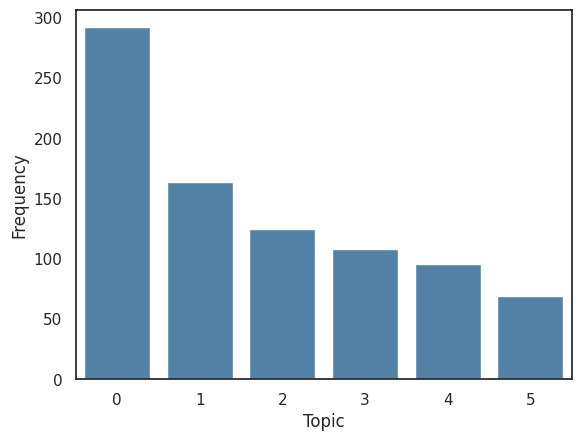

In [13]:
import seaborn as sns
# plot with seaborn barplot
sns.set(font_scale=1)
sns.set_style("white")
sns.barplot(data=topic_freq, x='Topic', y='Frequency', color='steelblue')

In [14]:
text_top_topics.groupby(['topic_prediction','party'])['topic_prediction'].count()

topic_prediction  party
0                 D        110
                  I          2
                  R        180
1                 D        117
                  I          2
                  R         45
2                 D         98
                  R         27
3                 D         99
                  I          1
                  R          8
4                 D         82
                  R         14
5                 D         67
                  R          2
Name: topic_prediction, dtype: int64

In [16]:
# Run BERTopic model for Democrats
topics, probabilities = topic_model.fit_transform(dem_text_clean['text_clean'].astype('str'))
topic_model.visualize_barchart(top_n_topics=10)

In [17]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]
# Save the predictions in the dataframe
dem_text_clean['topic_prediction'] = topic_prediction
text_top_topics = dem_text_clean.loc[dem_text_clean['topic_prediction'].isin([0,1,2,3,4,5,6,7,8,9])]
# Frequency for each topic
top_topic_freq = text_top_topics['topic_prediction'].value_counts()
topic_freq = top_topic_freq.reset_index()
topic_freq.columns = ['Topic', 'Frequency']
topic_freq

,Topic,Frequency
0,0,144
1,1,110
2,2,71
3,4,66
4,3,66
5,5,63
6,6,54
7,7,36
8,8,35
9,9,31


<Axes: xlabel='Topic', ylabel='Frequency'>

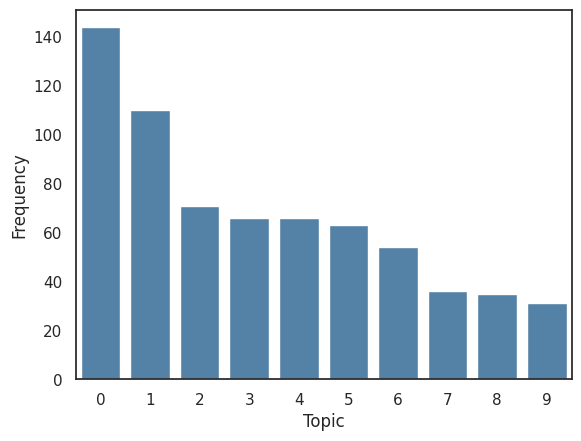

In [18]:
# plot with seaborn barplot
sns.set(font_scale=1)
sns.set_style("white")
sns.barplot(data=topic_freq, x='Topic', y='Frequency', color='steelblue')

In [19]:
# Run BERTopic model for Republicans
topics, probabilities = topic_model.fit_transform(rep_text_clean['text_clean'].astype('str'))
topic_model.visualize_barchart(top_n_topics=10)

In [20]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]
# Save the predictions in the dataframe
rep_text_clean['topic_prediction'] = topic_prediction
text_top_topics = rep_text_clean.loc[rep_text_clean['topic_prediction'].isin([0,1,2,3,4,5,6,7,8,9])]
# Frequency for each topic
top_topic_freq = text_top_topics['topic_prediction'].value_counts()
topic_freq = top_topic_freq.reset_index()
topic_freq.columns = ['Topic', 'Frequency']
topic_freq

,Topic,Frequency
0,0,74
1,1,65
2,2,47
3,3,29
4,4,25
5,5,17
6,6,16
7,7,15
8,8,15
9,9,15


<Axes: xlabel='Topic', ylabel='Frequency'>

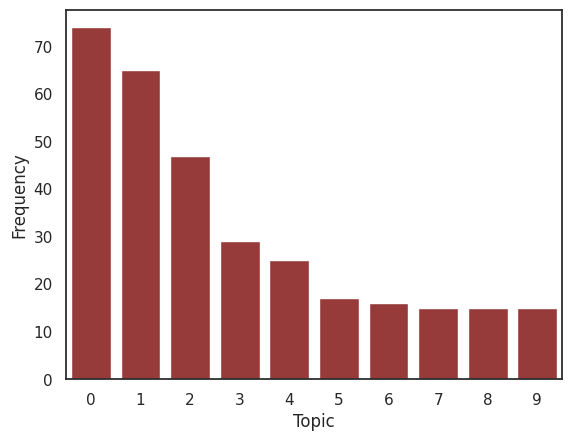

In [21]:
# plot with seaborn barplot
sns.set(font_scale=1)
sns.set_style("white")
sns.barplot(data=topic_freq, x='Topic', y='Frequency', color='#A62C2B')